# Import required libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from scipy.stats import norm
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

%load_ext autotime

time: 0 ns (started: 2022-08-17 09:43:16 +05:30)


# Loading the Data

In [2]:
df = pd.read_csv('TRAIN_Duchessa.csv')

time: 2.97 s (started: 2022-08-17 09:43:33 +05:30)


In [3]:
df.head(2)

,vessel_name,vessel_class,datetime_utc,sog,me_power,me_rpm,heading,apparent_wind_dir_degree,me_consumption_kg_h,apparent_wind_speed_kn,mean_draft_aft_vessel,mean_draft_fore_vessel,vessel_condition
0,STI YORKVILLE,DUCHESSA,2019-12-12 17:05:00,NaN,NaN,NaN,0.00376,NaN,NaN,NaN,NaN,NaN,Ballast
1,STI YORKVILLE,DUCHESSA,2019-12-24 03:45:00,NaN,NaN,NaN,54.79310,NaN,NaN,NaN,NaN,NaN,Ballast


time: 78 ms (started: 2022-08-17 09:43:36 +05:30)


In [4]:
# df.iloc[100:101, :]

time: 0 ns (started: 2022-08-17 09:43:40 +05:30)


In [5]:
df.columns.to_list()

['vessel_name',
 'vessel_class',
 'datetime_utc',
 'sog',
 'me_power',
 'me_rpm',
 'heading',
 'apparent_wind_dir_degree',
 'me_consumption_kg_h',
 'apparent_wind_speed_kn',
 'mean_draft_aft_vessel',
 'mean_draft_fore_vessel',
 'vessel_condition']

time: 0 ns (started: 2022-08-17 09:43:40 +05:30)


In [6]:
df.isnull().sum()

vessel_name                      0
vessel_class                     0
datetime_utc                     0
sog                         273630
me_power                    451169
me_rpm                      390945
heading                      64904
apparent_wind_dir_degree    107469
me_consumption_kg_h         394218
apparent_wind_speed_kn      124436
mean_draft_aft_vessel       866598
mean_draft_fore_vessel      734966
vessel_condition            136720
dtype: int64

time: 359 ms (started: 2022-08-17 09:43:41 +05:30)


In [7]:
df = df.dropna(thresh=13)                                # Dropping NA values

time: 453 ms (started: 2022-08-17 09:43:46 +05:30)


In [8]:
df = df.loc[df['me_power'] > 0 ]                         # Applying filters for sensible values of Power

time: 63 ms (started: 2022-08-17 09:43:49 +05:30)


In [9]:
df = df.loc[df['me_rpm'] > 0 ]                           # Non zero and real values of RPM

time: 31 ms (started: 2022-08-17 09:44:11 +05:30)


In [10]:
df = df.loc[df['apparent_wind_dir_degree'] >= 0 ]        # Non zero and real values of wind direction          

time: 32 ms (started: 2022-08-17 09:44:12 +05:30)


In [11]:
df = df.loc[df['me_consumption_kg_h'] > 0 ]              # Non zero and real values for consumptions

time: 46 ms (started: 2022-08-17 09:44:14 +05:30)


In [12]:
df.describe()

,sog,me_power,me_rpm,heading,apparent_wind_dir_degree,me_consumption_kg_h,apparent_wind_speed_kn,mean_draft_aft_vessel,mean_draft_fore_vessel
count,270521.000000,270521.000000,270521.000000,270521.000000,270521.000000,270521.000000,270521.000000,270521.000000,270521.000000
mean,12.003881,3914.161186,70.511883,191.198155,172.499835,700.572617,23.155130,6.629425,9.550254
std,2.029539,1190.021040,10.234435,98.499008,130.495645,220.276846,11.612754,1.741797,2.480365
min,0.000000,0.000012,0.000718,0.000000,0.000000,0.000600,0.000000,3.186160,-0.700000
25%,11.710801,3416.240321,69.124090,112.531710,37.542764,612.905999,15.268522,4.748850,6.812940
50%,12.444000,3934.597544,72.472263,199.754970,152.038650,708.419399,22.853268,7.339990,10.656300
75%,13.000000,4387.772396,75.721737,277.691448,310.586000,778.420190,29.808933,8.130450,11.467137
max,17.100000,8735.205348,93.801760,359.000000,359.000000,2356.691754,49.998849,86.764630,14.260035


time: 110 ms (started: 2022-08-17 09:45:21 +05:30)


# Weather Impact

Heading Angle

In [13]:
# Heading(degrees) to Radians

df['HEADING RAD'] = df['heading'].astype(float).apply(math.radians)

time: 47 ms (started: 2022-08-17 09:45:23 +05:30)


In [14]:
# Radians Heading to Cos elemet

df['COS HEADING RAD'] = df['HEADING RAD'].astype(float).apply(math.cos)           # OUTPUT 1

time: 78 ms (started: 2022-08-17 09:45:29 +05:30)


In [15]:
# Rad Heading to Sin element 

df['SIN HEADING RAD'] = df['HEADING RAD'].astype(float).apply(math.sin)           # OUTPUT 2

time: 94 ms (started: 2022-08-17 09:45:30 +05:30)


Wind Angle

In [16]:
# Wind angle(degree) to Radians

df['WIND ANGLE RAD'] = df['apparent_wind_dir_degree'].astype(float).apply(math.radians)                         

time: 47 ms (started: 2022-08-17 09:45:37 +05:30)


In [17]:
# Rad Wind Angle to Cos element

df['COS WIND ANGLE RAD'] = df['WIND ANGLE RAD'].astype(float).apply(math.cos)     # OUTPUT 3

time: 78 ms (started: 2022-08-17 09:45:37 +05:30)


In [18]:
# Rad Wind Angle to Sin element

df['SIN WIND ANGLE RAD'] = df['WIND ANGLE RAD'].astype(float).apply(math.sin)     # OUTPUT 4

time: 62 ms (started: 2022-08-17 09:45:38 +05:30)


Impact = (output 3 * output 1) + (output 4 * output 2)

In [19]:
df['IMPACT'] = (df['COS WIND ANGLE RAD'] * df['COS HEADING RAD']) + (df['SIN WIND ANGLE RAD'] * df['SIN HEADING RAD'])

time: 0 ns (started: 2022-08-17 09:45:39 +05:30)


In [20]:
df['WEATHER IMPACT'] = df['apparent_wind_speed_kn'] * df['IMPACT']                # Final engineered parameter

time: 0 ns (started: 2022-08-17 09:45:40 +05:30)


# Draft

In [21]:
df['DRAFT'] = df[['mean_draft_aft_vessel', 'mean_draft_fore_vessel']].mean(axis=1)

time: 31 ms (started: 2022-08-17 09:45:43 +05:30)


In [22]:
df = df.loc[df['DRAFT'] >= 4 ]                                  # Setting Limit on Draft

time: 78 ms (started: 2022-08-17 09:45:43 +05:30)


In [23]:
df = df.loc[df['DRAFT'] <= 14 ]                                 # Setting limit omn Draft

time: 47 ms (started: 2022-08-17 09:45:44 +05:30)


# Speed over Ground

In [24]:
df['Cubed Speed'] = (df['sog'])**3

time: 15 ms (started: 2022-08-17 09:45:46 +05:30)


List of the focused parameters 

In [25]:
# Parameters required:
#     Shaft Power              YES
#     Ship Speed               YES
#     Weather Impact           YES
#     RPM                      YES
#     Draft of Vessel          YES
#     Speed 

# Output:
#     ME Consumption           YES

time: 0 ns (started: 2022-08-17 09:45:50 +05:30)


# Preparing the Main Data Set

In [26]:
data = df[['datetime_utc', 'me_power', 'sog', 'WEATHER IMPACT', 'me_rpm', 'DRAFT', 'me_consumption_kg_h', 'Cubed Speed']]

time: 47 ms (started: 2022-08-17 09:45:51 +05:30)


In [27]:
# data = data.loc[data['sog'] > 10]             # For further fine tuning

time: 0 ns (started: 2022-08-17 09:45:57 +05:30)


In [28]:
data.tail()

,datetime_utc,me_power,sog,WEATHER IMPACT,me_rpm,DRAFT,me_consumption_kg_h,Cubed Speed
1464955,2020-10-24 14:35:00,4281.429787,12.48370,-14.205186,74.21806,6.863775,798.51109,1945.494334
1464956,2020-10-24 14:40:00,4286.552339,12.12247,19.297306,74.19468,6.862345,777.48050,1781.448837
1464957,2020-10-24 14:45:00,4540.597465,12.50804,-26.878110,74.19620,6.880350,839.30207,1956.896175
1464958,2020-10-24 14:50:00,4487.777355,12.82564,-28.228749,74.18070,6.882760,829.08547,2109.779834
1464959,2020-10-24 14:55:00,4469.122789,13.01174,-24.184574,74.21461,6.880530,853.15188,2202.957557


time: 16 ms (started: 2022-08-17 09:45:58 +05:30)


In [29]:
# data.isnull().sum()

time: 0 ns (started: 2022-08-17 09:46:03 +05:30)


# Data for Model

In [30]:
inputs = data[['WEATHER IMPACT', 'DRAFT', 'me_rpm', 'Cubed Speed', 'me_power']]
target = data['me_consumption_kg_h']

time: 0 ns (started: 2022-08-17 09:46:05 +05:30)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state= 25)

time: 47 ms (started: 2022-08-17 09:46:06 +05:30)


# Linear Regression

In [32]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

time: 46 ms (started: 2022-08-17 09:46:18 +05:30)


# Coefficient and Intercept of the Model

In [33]:
reg.coef_

array([ 2.40177904e-01, -5.19464915e-01,  9.75366844e+00,  1.34628839e-03,
        4.75819775e-02])

time: 0 ns (started: 2022-08-17 09:46:23 +05:30)


In [34]:
reg.intercept_

-171.2837195732733

time: 16 ms (started: 2022-08-17 09:46:30 +05:30)


In [35]:
linear_reg = reg.score(X_test, y_test)

time: 16 ms (started: 2022-08-17 09:46:31 +05:30)


# Score of th Model

In [36]:
linear_reg

0.45281106385469216

time: 0 ns (started: 2022-08-17 09:46:37 +05:30)


# R2 of the Model

In [37]:
# df.columns.to_list()

time: 0 ns (started: 2022-08-17 09:46:47 +05:30)


In [38]:
y = data['me_consumption_kg_h']

time: 0 ns (started: 2022-08-17 09:46:49 +05:30)


In [39]:
y_pred = reg.predict(data[['WEATHER IMPACT', 'DRAFT', 'me_rpm', 'Cubed Speed', 'me_power']])

time: 15 ms (started: 2022-08-17 09:47:00 +05:30)


In [40]:
r2_score(y, y_pred)

0.44252296283520964

time: 15 ms (started: 2022-08-17 09:47:02 +05:30)


# Residuals

In [41]:
y.describe()

count    270512.000000
mean        700.576065
std         220.276294
min           0.000600
25%         612.899913
50%         708.431402
75%         778.424290
max        2356.691754
Name: me_consumption_kg_h, dtype: float64

time: 16 ms (started: 2022-08-17 09:47:03 +05:30)


In [42]:
residuals = y_pred - y
residuals.mean()

0.12490459634298164

time: 0 ns (started: 2022-08-17 09:47:04 +05:30)


# Random Forest Regression

In [43]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
rfr = RandomForestRegressor(n_estimators = 50, random_state = 0)
 
# fit the regressor with x and y data
rfr.fit(X_train, y_train) 

# Check the score of the prediction
rfr.score(X_test, y_test)

# # Make predictions for the test set
# y_pred_test = regressor.predict(X_test)   
# y_pred_test

0.9001029363479033

time: 1min 17s (started: 2022-08-17 09:55:02 +05:30)


# Score of the 2nd Model

In [44]:
actual = data['me_consumption_kg_h']
predicted = rfr.predict(data[['WEATHER IMPACT','DRAFT','me_rpm','Cubed Speed', 'me_power']])
r2_score(actual, predicted)

0.9690082568794158

time: 3.11 s (started: 2022-08-17 09:59:23 +05:30)


In [45]:
residuals_rfr = actual - predicted
residuals_rfr.describe()

count    270512.000000
mean         -0.447325
std          38.775898
min       -1028.554668
25%          -6.198589
50%          -1.340427
75%           1.782462
max        1190.020947
Name: me_consumption_kg_h, dtype: float64

time: 16 ms (started: 2022-08-17 09:59:28 +05:30)


# Test case:
    Voyage of STI Duchessa:
        30th Dec 2021 - 14th Jan 2022

In [46]:
test = pd.read_excel('TEST.xlsx', sheet_name = 'TEST')

time: 3.66 s (started: 2022-08-17 09:59:42 +05:30)


In [47]:
test.columns.to_list()

['Sample time',
 'SOG',
 'HEADING(degree)',
 'ME RPM(RPM)',
 'Fore Draft',
 'Aft Draft',
 'WIND ANGLE(degree)',
 'WIND SPEED(m/h)',
 'Shaft Power',
 'ME and GE Total flow',
 'GE Inlet Flow',
 'GE Outlet Flow',
 'me_consumptions']

time: 16 ms (started: 2022-08-17 09:59:51 +05:30)


In [48]:
test = test.loc[test['me_consumptions'] > 0 ]

time: 0 ns (started: 2022-08-17 10:00:36 +05:30)


In [49]:
test = test.loc[test['Shaft Power'] > 0 ]

time: 16 ms (started: 2022-08-17 10:00:37 +05:30)


In [50]:
# Heading to rad

test['HEADING RAD'] = test['HEADING(degree)'].astype(float).apply(math.radians)

time: 16 ms (started: 2022-08-17 10:00:41 +05:30)


In [51]:
# Rad Heading to Cos

test['COS HEADING RAD'] = test['HEADING RAD'].astype(float).apply(math.cos)           # OUTPUT 1

time: 0 ns (started: 2022-08-17 10:00:42 +05:30)


In [52]:
# Rad Heading to Cos

test['SIN HEADING RAD'] = test['HEADING RAD'].astype(float).apply(math.sin)           # OUTPUT 2

time: 0 ns (started: 2022-08-17 10:00:43 +05:30)


In [53]:
# Wind angle to Rad

test['WIND ANGLE RAD'] = test['WIND ANGLE(degree)'].astype(float).apply(math.radians)                         

time: 0 ns (started: 2022-08-17 10:00:45 +05:30)


In [54]:
# Rad Wind Angle to Cos

test['COS WIND ANGLE RAD'] = test['WIND ANGLE RAD'].astype(float).apply(math.cos)     # OUTPUT 3

time: 0 ns (started: 2022-08-17 10:00:47 +05:30)


In [55]:
# Rad Wind Angle to Cos

test['SIN WIND ANGLE RAD'] = test['WIND ANGLE RAD'].astype(float).apply(math.sin)     # OUTPUT 4

time: 16 ms (started: 2022-08-17 10:00:48 +05:30)


In [56]:
test['IMPACT'] = (test['COS WIND ANGLE RAD'] * test['COS HEADING RAD']) + (test['SIN WIND ANGLE RAD'] * test['SIN HEADING RAD'])

time: 0 ns (started: 2022-08-17 10:00:50 +05:30)


In [57]:
test['IMPACT'].describe()              

count    4097.000000
mean       -0.526227
std         0.522702
min        -1.000000
25%        -0.912768
50%        -0.693461
75%        -0.378225
max         0.999997
Name: IMPACT, dtype: float64

time: 0 ns (started: 2022-08-17 10:00:51 +05:30)


In [58]:
test['WEATHER IMPACT'] = test['WIND SPEED(m/h)'] * test['IMPACT']

time: 0 ns (started: 2022-08-17 10:00:53 +05:30)


In [59]:
test['WEATHER IMPACT'].describe()

count    4097.000000
mean      -10.895108
std        10.805378
min       -38.149990
25%       -18.569813
50%        -9.314007
75%        -3.851534
max        36.268354
Name: WEATHER IMPACT, dtype: float64

time: 0 ns (started: 2022-08-17 10:00:53 +05:30)


In [60]:
test['DRAFT'] = test[['Aft Draft', 'Fore Draft']].mean(axis=1)

time: 0 ns (started: 2022-08-17 10:00:53 +05:30)


In [61]:
test = test.loc[test['DRAFT'] > 5 ]  

time: 0 ns (started: 2022-08-17 10:00:55 +05:30)


In [62]:
test['Cubed Speed'] = (test['SOG'])**3

time: 0 ns (started: 2022-08-17 10:00:55 +05:30)


# Feeing test data to Linear Regression Model 

In [63]:
test_pred = reg.predict(test[['WEATHER IMPACT', 'DRAFT', 'ME RPM(RPM)', 'Cubed Speed', 'Shaft Power']])

time: 0 ns (started: 2022-08-17 10:01:22 +05:30)


In [64]:
test['Predicted Fuel'] = test_pred

time: 0 ns (started: 2022-08-17 10:01:30 +05:30)


In [65]:
test_actual = test['me_consumptions']

time: 0 ns (started: 2022-08-17 10:01:31 +05:30)


In [66]:
test['residuals'] = ((test['me_consumptions'] - test['Predicted Fuel'])/test['Predicted Fuel']) * 100

time: 0 ns (started: 2022-08-17 10:01:33 +05:30)


In [ ]:
# r2_score(test_actual, test_pred)

In [67]:
residuals.describe()                    # The mean residual is observed for deviation values

count    270512.000000
mean          0.124905
std         164.467893
min       -1722.307811
25%         -25.381319
50%          21.313628
75%          65.753586
max         638.697567
Name: me_consumption_kg_h, dtype: float64

time: 16 ms (started: 2022-08-17 10:01:36 +05:30)


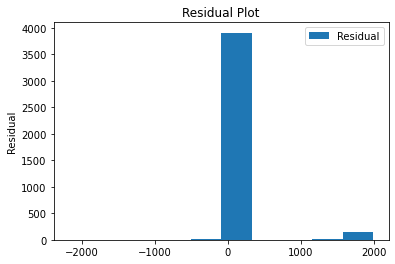

time: 156 ms (started: 2022-08-17 10:17:25 +05:30)


In [88]:
import matplotlib.pyplot as plt
# line 1 points

a1 = test['residuals']
# plotting the line 1 points 
plt.hist(a1, label = "Residual")

plt.xlabel('')
# Set the y axis label of the current axis.
plt.ylabel('Residual')
# Set a title of the current axes.
plt.title('Residual Plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
# test.head()

In [ ]:
# test.to_excel(r'C:\Users\addsouza\Documents\Test_Fuel_Kong.xlsx', index = False)        # Export the data set

# Feeding test data to Random Forest Regression Model

In [69]:
test_pred = rfr.predict(test[['WEATHER IMPACT', 'DRAFT', 'ME RPM(RPM)', 'Cubed Speed', 'Shaft Power']])

time: 63 ms (started: 2022-08-17 10:05:33 +05:30)


In [70]:
test['Predicted Fuel'] = test_pred

time: 0 ns (started: 2022-08-17 10:05:47 +05:30)


In [71]:
test_actual = test['me_consumptions']

time: 0 ns (started: 2022-08-17 10:05:53 +05:30)


In [72]:
test['residuals_rfr'] = ((test['me_consumptions'] - test['Predicted Fuel'])/test['Predicted Fuel']) * 100

time: 0 ns (started: 2022-08-17 10:06:10 +05:30)


In [73]:
residuals_rfr.describe()    

count    270512.000000
mean         -0.447325
std          38.775898
min       -1028.554668
25%          -6.198589
50%          -1.340427
75%           1.782462
max        1190.020947
Name: me_consumption_kg_h, dtype: float64

time: 16 ms (started: 2022-08-17 10:06:24 +05:30)


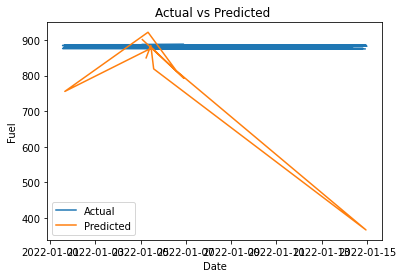

time: 172 ms (started: 2022-08-17 10:14:04 +05:30)


In [82]:
import matplotlib.pyplot as plt
# line 1 points
x1 = test['Sample time'].iloc[50:100]
y1 = test['me_consumptions'].iloc[50:100]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Actual")
# line 2 points
x2 = test['Sample time'].iloc[50:60]
y2 = test['Predicted Fuel'].iloc[50:60]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Predicted")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Fuel')
# Set a title of the current axes.
plt.title('Actual vs Predicted ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

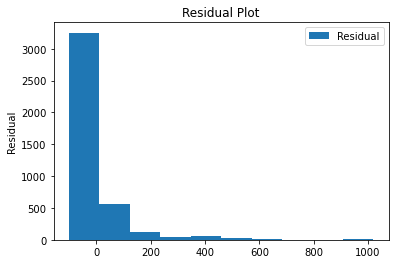

time: 141 ms (started: 2022-08-17 10:16:41 +05:30)


In [87]:
import matplotlib.pyplot as plt
# line 1 points

b1 = test['residuals_rfr']
# plotting the line 1 points 
plt.hist(b1, label = "Residual")

plt.xlabel('')
# Set the y axis label of the current axis.
plt.ylabel('Residual')
# Set a title of the current axes.
plt.title('Residual Plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()